### purpose

compare LA and IBE in an isolated ANOVA

In [1]:
from pythonimports import *
from myfigs import slope_graph, adjust_box_widths, save_pdf

import MVP_summary_functions as mvp

import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import levene  # brown-forsythe test of equal variance
plt.rcParams.update({'font.family' : 'serif'})

t1 = dt.now()  # notebook timer

mvp.latest_commit()
session_info.show()

#########################################################
Today:	August 24, 2023 - 10:43:02 EDT
python version: 3.8.5
conda env: mvp_env

Current commit of pythonimports:
commit 9493334506a1f2926fba0734fa74ba2f87194611  
Author: Brandon Lind <lind.brandon.m@gmail.com>  
Date:   Fri Jun 30 09:41:00 2023 -0400

Current commit of MVP_offsets:
commit dcaf4a98ad33a59e3d371eed0bb26b1885505dcf  
Author: Brandon Lind <lind.brandon.m@gmail.com>  
Date:   Sat Jun 24 12:25:29 2023 -0400
#########################################################



# Get IBE data

from ibe_vs_performance

In [18]:
ibe = pd.read_table('/work/lotterhos/MVP-Offsets/run_20220919/summaries/02_main_questions/10_ibe_vs_performance',
                    index_col=0)

ibe

,1231094,1231095,1231096,1231097,1231098,1231099,1231100,1231101,1231102,1231103,1231104,1231105,1231106,1231107,1231108,1231109,1231110,1231111,1231112,1231113,1231114,1231115,1231116,1231117,1231118,1231119,1231120,1231121,1231122,1231123,1231124,1231125,1231126,1231127,1231128,1231129,1231130,1231131,1231132,1231133,1231134,1231135,1231136,1231137,1231138,1231139,1231140,1231141,1231142,1231143,...,1233294,1233295,1233296,1233297,1233298,1233299,1233300,1233301,1233302,1233303,1233304,1233305,1233306,1233307,1233308,1233309,1233310,1233311,1233312,1233313,1233314,1233315,1233316,1233317,1233318,1233319,1233320,1233321,1233322,1233323,1233324,1233325,1233326,1233327,1233328,1233329,1233330,1233331,1233332,1233333,1233334,1233335,1233336,1233337,1233338,1233339,1233340,1233341,1233342,1233343
adaptive,0.928419,0.724388,0.952396,0.963189,0.838841,0.654849,0.615601,0.842283,0.798687,0.549209,0.640068,0.538729,0.879719,0.763682,0.609248,0.673321,0.549446,0.654553,0.654239,0.636920,0.827337,0.682419,0.884929,0.923793,0.766868,0.547443,0.506620,0.703294,0.650147,0.571034,0.640937,0.522651,0.630672,0.634559,0.522936,0.802686,0.639815,0.916125,0.886783,0.744514,0.528371,0.472318,0.672279,0.648270,0.563538,0.639685,0.521555,0.647347,0.601497,0.495821,...,0.557333,0.744915,0.812435,0.730098,0.628262,0.793123,0.776309,0.620147,0.753349,0.750726,0.851055,0.854458,0.790604,0.793747,0.808924,0.843183,0.680873,0.591253,0.760153,0.605637,0.731583,0.740347,0.748592,0.571066,0.666361,0.768465,0.729823,0.799545,0.756074,0.765191,0.696381,0.717424,0.662306,0.739240,0.681851,0.579600,0.634718,0.730102,0.699288,0.739805,0.657820,0.723085,0.820902,0.736628,0.737758,0.701511,0.599988,0.713176,0.663360,0.704393
all,0.907638,0.732075,0.971627,0.967951,0.839331,0.518723,0.514924,0.789537,0.627899,0.419513,0.518323,0.495138,0.816955,0.623024,0.510167,0.645403,0.509850,0.629566,0.624460,0.611237,0.757919,0.556366,0.865934,0.883421,0.689322,0.476378,0.402215,0.588422,0.552980,0.419642,0.628611,0.489988,0.627977,0.609973,0.533932,0.741761,0.544276,0.867972,0.884026,0.725073,0.465062,0.392804,0.568175,0.533410,0.451377,0.634587,0.490216,0.629884,0.606230,0.488587,...,0.462543,0.397653,0.578748,0.544538,0.361456,0.642941,0.502033,0.613531,0.612284,0.613833,0.741463,0.559489,0.858922,0.888533,0.538282,0.474849,0.385156,0.561912,0.526593,0.376479,0.626589,0.514194,0.632000,0.607229,0.609315,0.771560,0.578149,0.867956,0.903309,0.724769,0.475436,0.419669,0.590976,0.586512,0.311451,0.619380,0.491929,0.624829,0.612782,0.538438,0.725431,0.564197,0.875351,0.899594,0.619243,0.465491,0.382862,0.561882,0.535268,0.465504
neutral,0.904934,0.737878,0.968654,0.962997,0.830187,0.486564,0.504292,0.782030,0.572302,0.385274,0.485665,0.477999,0.781068,0.579171,0.474933,0.638132,0.502415,0.620449,0.619119,0.601861,0.728521,0.522216,0.839371,0.844526,0.649046,0.467906,0.376023,0.549490,0.506820,0.372617,0.615475,0.487079,0.624882,0.607240,0.545811,0.718026,0.520098,0.836589,0.853657,0.714286,0.458001,0.376530,0.538566,0.506026,0.413001,0.629506,0.488193,0.621413,0.607232,0.501181,...,0.458198,0.372380,0.544369,0.503600,0.348904,0.627978,0.505495,0.618009,0.604790,0.606859,0.710334,0.531048,0.830278,0.858375,0.508207,0.453787,0.371917,0.534483,0.488510,0.364542,0.620948,0.508648,0.621342,0.606095,0.593498,0.748953,0.549528,0.829302,0.874863,0.681373,0.450248,0.389837,0.569189,0.537339,0.280191,0.621206,0.478653,0.620921,0.609945,0.526809,0.727716,0.535810,0.835811,0.866703,0.556298,0.453541,0.357976,0.539338,0.502446,0.422945


# load 2-trait performance for _all_ markers

In [11]:
# load data
data = mvp.subset_data_scores(
    mvp.combine_level_dicts(
        use_bcs_data=True,
    ),
    apply_median=True
)

filtering criteria:
	use_bcs_data = True
	performance = garden_performance
	num_traits = 2
	ntraits = None
	marker_set = all
	remove_structcrxn = False
	keep_nuisance = False
	remove_rda_outliers = True


reading reps: 100%|███████████████| 10/10 [00:20<00:00,  2.06s/it]


0-225
	 RONA num seeds =  180
	 lfmm2 num seeds =  180
	 GF num seeds =  180
	 rda num seeds =  180


225-450
	 RONA num seeds =  180
	 lfmm2 num seeds =  180
	 GF num seeds =  180
	 rda num seeds =  180


450-675
	 RONA num seeds =  180
	 lfmm2 num seeds =  180
	 GF num seeds =  180
	 rda num seeds =  180


675-900
	 RONA num seeds =  180
	 lfmm2 num seeds =  180
	 GF num seeds =  180
	 rda num seeds =  180


900-1125
	 RONA num seeds =  180
	 lfmm2 num seeds =  180
	 GF num seeds =  180
	 rda num seeds =  180


1125-1350
	 RONA num seeds =  180
	 lfmm2 num seeds =  180
	 GF num seeds =  180
	 rda num seeds =  180


1350-1575
	 RONA num seeds =  180
	 lfmm2 num seeds =  180
	 GF num seeds =  180
	 rda num seeds =  180


1575-1800
	 RONA num seeds =  180
	 lfmm2 num seeds =  180
	 GF num seeds =  180
	 rda num seeds =  180


1800-2025
	 RONA num seeds =  180
	 lfmm2 num seeds =  180
	 GF num seeds =  180
	 rda num seeds =  180


2025-2250
	 RONA num seeds =  180
	 lfmm2 num seeds =  18

In [23]:
# combine into a single dataframe
dfs = []
for program, series in data.items():
    df = pd.DataFrame(series)
    df['program'] = program
    dfs.append(df)

all_data = pd.concat(dfs)

all_data.head()

,score,program
seed,,
1231109,-0.342424,RONA-sal_opt
1231110,-0.440000,RONA-sal_opt
1231111,-0.365455,RONA-sal_opt
1231112,-0.346263,RONA-sal_opt
1231113,-0.222424,RONA-sal_opt


In [24]:
# combine performance data with IBE data
all_data = pd.merge(ibe.T, all_data, left_index=True, right_index=True)

all_data['final_LA'] = all_data.index.map(mvp.get_summary_data()['final_LA'])

all_data.head()

,adaptive,all,neutral,score,program,final_LA
1231109,0.673321,0.645403,0.638132,-0.342424,RONA-sal_opt,0.501332
1231109,0.673321,0.645403,0.638132,-0.624040,RONA-temp_opt,0.501332
1231109,0.673321,0.645403,0.638132,-0.601616,lfmm2,0.501332
1231109,0.673321,0.645403,0.638132,-0.666869,GF,0.501332
1231109,0.673321,0.645403,0.638132,-0.686604,rda-nocorr,0.501332


In [28]:
all_data.score.isnull().sum()

0

In [30]:
all_data['all'].isnull().sum()

0

In [31]:
all_data.final_LA.isnull().sum()

0

# ANOVA functions

In [34]:
def print_summary_table(lm):
    """Do lm.summary2().__repr__() but just display the first table in lm.summary2().tables.
    
    summary - return from lm.summary2()
    """
    from statsmodels.iolib.summary2 import _simple_tables, _measure_tables

    summary = lm.summary2()
    
    tables = [summary.tables[0]]
    settings = [summary.settings[0]]
    pad_col, pad_index, widest = _measure_tables(tables, settings)
    rule_equal = widest * '='

    simple_tables = _simple_tables(tables, settings, pad_col, pad_index)
    tab = [x.as_text() for x in simple_tables]

    tab = '\n'.join(tab)
    tab = tab.split('\n')
    tab[0] = rule_equal
    tab.append(rule_equal)
    tab = '\n'.join(tab)
    
    print(tab)
    
    pass


def get_anova(formula_key, bcs_garden_data=None, typ=None):
    """Estimate ANOVA using evolutionary parameters as factors.
    
    Parameters
    ----------
    formula_key : str
        used to index formulas just above
    typ : int
        the Type of ANOVA - 1, 2, or 3
    bcs_garden_data : pd.DataFrame
        the performance data to use in ANOVA model - either `all`-, `neutral`-, or `adaptive`-based performance
    
    Notes
    -----
    - displays statistical info from ANOVA and qqplot
    - C(factor) treats a numerical entry as a category (gardens are integer IDs)
    """
    # determine formula
    formula = formulas[formula_key]
    
    # determine Type of ANOVA
    if typ is None:
        typ = 3 if 'interaction' in formula_key else 2
    
    # get anovas
    lms = {}
    res = {}
    sos = []
    for program in bcs_garden_data.program.unique():
        _df = bcs_garden_data[bcs_garden_data.program == program].copy()

        print(f'\n{ColorText(formula_key).bold()} {ColorText(formula).blue()}')
        print(f'{ColorText(program).green().bold()}')

        # perform type 2 anova
        lms[program] = ols(formula, data=_df).fit()
        res[program] = anova_lm(lms[program], typ=typ)
        
        # get percentages for sum of squares
        res[program]['perc_sum_sq'] = (
            (
                (res[program]['sum_sq'] / res[program]['sum_sq'].sum()) * 100
            ).round(2)
        )
        if round(abs(res[program]['perc_sum_sq'].sum() - 100), 2) > 0.03:  # account for compounding error rounding percs
            raise Exception('bad percentage', abs(res[program]['perc_sum_sq'].sum() - 100))

#         res[program].index = res[program].index.map(mvp.factor_names)

        # brown-forsythe test?
        # TODO?

        # show more info
        display(res[program])
        print_summary_table(lms[program])

        sm.qqplot(lms[program].resid, line="45")
        plt.show()

        # get sum of squares
        sos.append(
            pd.Series(
                res[program]['sum_sq'].tolist(),
                name=program,
                index=res[program]['sum_sq'].index#.map(mvp.factor_names)
            )
        )
        
    return lms, res, sos

# ANOVAs

each anova looks to see whether performance is impacted more so by the level of LA on the lanscape or the level of IBE in the markers used for evaluation

### effect of IBE from _all_ markers

In [ ]:
# FORMULA BUILDING
formulas = {
    # same as 'simple' but without `slevel`
    'all_markers' : 'score ~ all + final_LA',  # "all" means use IBE vals calc'd from `all` markers
}

# set up blank dictionaries to fill in later
lms = {}  # linear models
res = {}  # anova output
sos = {}  # rank of factors


super_simple score ~ all + final_LA
RONA-sal_opt


,sum_sq,df,F,PR(>F),perc_sum_sq
all,13.066056,1.0,939.445081,2.543708e-166,34.04
final_LA,0.321152,1.0,23.090730,1.673759e-06,0.84
Residual,24.993162,1797.0,NaN,NaN,65.12


Model:              OLS              Adj. R-squared:     0.356     
Dependent Variable: score            AIC:                -2584.3127
Date:               2023-08-24 11:20 BIC:                -2567.8261
No. Observations:   1800             Log-Likelihood:     1295.2    
Df Model:           2                F-statistic:        497.7     
Df Residuals:       1797             Prob (F-statistic): 1.02e-172 
R-squared:          0.356            Scale:              0.013908  


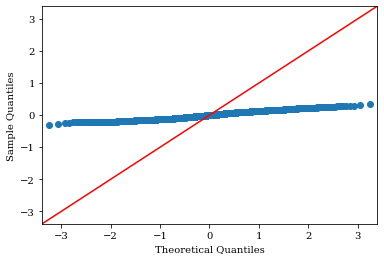


super_simple score ~ all + final_LA
RONA-temp_opt


,sum_sq,df,F,PR(>F),perc_sum_sq
all,0.086501,1.0,8.324025,0.003959,0.18
final_LA,30.251825,1.0,2911.137332,0.000000,61.72
Residual,18.673983,1797.0,NaN,NaN,38.10


Model:              OLS              Adj. R-squared:     0.622     
Dependent Variable: score            AIC:                -3108.9605
Date:               2023-08-24 11:20 BIC:                -3092.4739
No. Observations:   1800             Log-Likelihood:     1557.5    
Df Model:           2                F-statistic:        1484.     
Df Residuals:       1797             Prob (F-statistic): 0.00      
R-squared:          0.623            Scale:              0.010392  


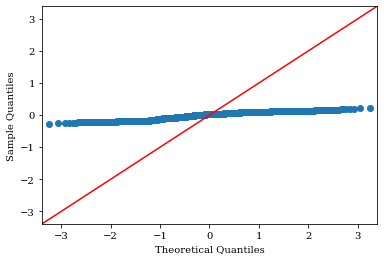


super_simple score ~ all + final_LA
lfmm2


,sum_sq,df,F,PR(>F),perc_sum_sq
all,3.673454,1.0,873.091702,9.874623e-157,8.64
final_LA,31.290136,1.0,7436.913517,0.000000e+00,73.58
Residual,7.560714,1797.0,NaN,NaN,17.78


Model:              OLS              Adj. R-squared:     0.830     
Dependent Variable: score            AIC:                -4736.4587
Date:               2023-08-24 11:20 BIC:                -4719.9721
No. Observations:   1800             Log-Likelihood:     2371.2    
Df Model:           2                F-statistic:        4408.     
Df Residuals:       1797             Prob (F-statistic): 0.00      
R-squared:          0.831            Scale:              0.0042074 


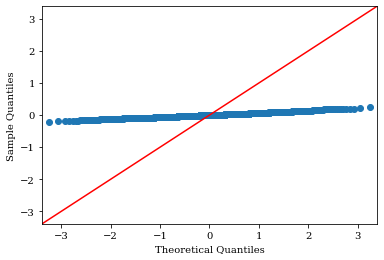


super_simple score ~ all + final_LA
GF


,sum_sq,df,F,PR(>F),perc_sum_sq
all,8.505224,1.0,749.172746,3.638160e-138,10.54
final_LA,51.787680,1.0,4561.657568,0.000000e+00,64.18
Residual,20.401019,1797.0,NaN,NaN,25.28


Model:              OLS              Adj. R-squared:     0.759     
Dependent Variable: score            AIC:                -2949.7441
Date:               2023-08-24 11:20 BIC:                -2933.2575
No. Observations:   1800             Log-Likelihood:     1477.9    
Df Model:           2                F-statistic:        2836.     
Df Residuals:       1797             Prob (F-statistic): 0.00      
R-squared:          0.759            Scale:              0.011353  


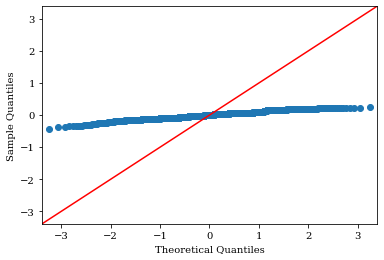


super_simple score ~ all + final_LA
rda-nocorr


,sum_sq,df,F,PR(>F),perc_sum_sq
all,10.763364,1.0,827.118396,6.020460e-150,12.54
final_LA,51.668736,1.0,3970.521018,0.000000e+00,60.21
Residual,23.384518,1797.0,NaN,NaN,27.25


Model:              OLS              Adj. R-squared:     0.741     
Dependent Variable: score            AIC:                -2704.0633
Date:               2023-08-24 11:20 BIC:                -2687.5767
No. Observations:   1800             Log-Likelihood:     1355.0    
Df Model:           2                F-statistic:        2574.     
Df Residuals:       1797             Prob (F-statistic): 0.00      
R-squared:          0.741            Scale:              0.013013  


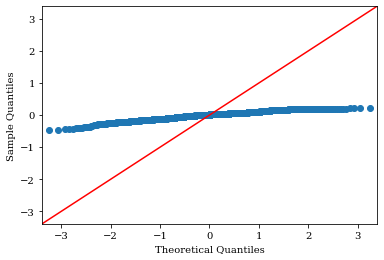


super_simple score ~ all + final_LA
rda-structcorr


,sum_sq,df,F,PR(>F),perc_sum_sq
all,3.192007,1.0,78.914320,1.537690e-18,4.20
final_LA,0.062105,1.0,1.535395,2.154664e-01,0.08
Residual,72.686890,1797.0,NaN,NaN,95.71


Model:              OLS              Adj. R-squared:     0.043    
Dependent Variable: score            AIC:                -662.7069
Date:               2023-08-24 11:20 BIC:                -646.2203
No. Observations:   1800             Log-Likelihood:     334.35   
Df Model:           2                F-statistic:        41.48    
Df Residuals:       1797             Prob (F-statistic): 2.44e-18 
R-squared:          0.044            Scale:              0.040449 


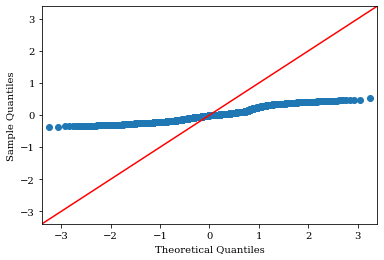

In [35]:
formula_key = 'all_markers'
lms[formula_key], res[formula_key], sos[formula_key] = get_anova(formula_key, bcs_garden_data=all_data)

In [ ]:
high

34.04

low 

0.18


In [1]:
(34.04 + 0.18 + 8.64 + 10.54 + 12.54 + 4.20) / 6

11.69

### effect of IBE from _adaptive_ markers

In [38]:
# load adaptive performance data
data_adaptive = mvp.subset_data_scores(
    mvp.combine_level_dicts(
        use_bcs_data=False,
        num_traits=2,
        marker_set='adaptive',
        keep_nuisance=False        
    ),
    apply_median=True
)

# combine method performances into one dataframe
dfs = []
for program, series in data_adaptive.items():
    df = pd.DataFrame(series)
    df['program'] = program
    dfs.append(df)

adaptive_data = pd.concat(dfs)

# combine performance and IBE data
adaptive_data = pd.merge(ibe.T, adaptive_data, left_index=True, right_index=True)

# map in LA
adaptive_data['final_LA'] = adaptive_data.index.map(mvp.get_summary_data()['final_LA'])

# show dataframe
adaptive_data.head()

filtering criteria:
	use_bcs_data = False
	performance = garden_performance
	num_traits = 2
	ntraits = None
	marker_set = adaptive
	remove_structcrxn = False
	keep_nuisance = False
	remove_rda_outliers = True


reading reps: 100%|███████████████| 10/10 [00:19<00:00,  1.91s/it]


0-225
	 RONA num seeds =  180
	 lfmm2 num seeds =  180
	 GF num seeds =  180
	 rda num seeds =  180


225-450
	 RONA num seeds =  180
	 lfmm2 num seeds =  180
	 GF num seeds =  180
	 rda num seeds =  180


450-675
	 RONA num seeds =  180
	 lfmm2 num seeds =  180
	 GF num seeds =  180
	 rda num seeds =  180


675-900
	 RONA num seeds =  180
	 lfmm2 num seeds =  180
	 GF num seeds =  180
	 rda num seeds =  180


900-1125
	 RONA num seeds =  180
	 lfmm2 num seeds =  180
	 GF num seeds =  180
	 rda num seeds =  180


1125-1350
	 RONA num seeds =  180
	 lfmm2 num seeds =  180
	 GF num seeds =  180
	 rda num seeds =  180


1350-1575
	 RONA num seeds =  180
	 lfmm2 num seeds =  180
	 GF num seeds =  180
	 rda num seeds =  180


1575-1800
	 RONA num seeds =  180
	 lfmm2 num seeds =  180
	 GF num seeds =  180
	 rda num seeds =  180


1800-2025
	 RONA num seeds =  180
	 lfmm2 num seeds =  180
	 GF num seeds =  180
	 rda num seeds =  180


2025-2250
	 RONA num seeds =  180
	 lfmm2 num seeds =  18

,adaptive,all,neutral,score,program,final_LA
1231109,0.673321,0.645403,0.638132,-0.362424,RONA-sal_opt,0.501332
1231109,0.673321,0.645403,0.638132,-0.604646,RONA-temp_opt,0.501332
1231109,0.673321,0.645403,0.638132,-0.665455,lfmm2,0.501332
1231109,0.673321,0.645403,0.638132,-0.667273,GF,0.501332
1231109,0.673321,0.645403,0.638132,-0.610233,rda-nocorr,0.501332


In [42]:
# load neutral performance data
data_neutral = mvp.subset_data_scores(
    mvp.combine_level_dicts(
        use_bcs_data=False,
        num_traits=2,
        marker_set='neutral',
        keep_nuisance=False        
    ),
    apply_median=True
)

# combine method performances into one dataframe
dfs = []
for program, series in data_neutral.items():
    df = pd.DataFrame(series)
    df['program'] = program
    dfs.append(df)

neutral_data = pd.concat(dfs)

# combine performance and IBE data
neutral_data = pd.merge(ibe.T, neutral_data, left_index=True, right_index=True)

# map in LA
neutral_data['final_LA'] = neutral_data.index.map(mvp.get_summary_data()['final_LA'])

# show dataframe
neutral_data.head()

filtering criteria:
	use_bcs_data = False
	performance = garden_performance
	num_traits = 2
	ntraits = None
	marker_set = neutral
	remove_structcrxn = False
	keep_nuisance = False
	remove_rda_outliers = True


reading reps: 100%|███████████████| 10/10 [00:19<00:00,  1.90s/it]


0-225
	 RONA num seeds =  180
	 lfmm2 num seeds =  180
	 GF num seeds =  180
	 rda num seeds =  180


225-450
	 RONA num seeds =  180
	 lfmm2 num seeds =  180
	 GF num seeds =  180
	 rda num seeds =  180


450-675
	 RONA num seeds =  180
	 lfmm2 num seeds =  180
	 GF num seeds =  180
	 rda num seeds =  180


675-900
	 RONA num seeds =  180
	 lfmm2 num seeds =  180
	 GF num seeds =  180
	 rda num seeds =  180


900-1125
	 RONA num seeds =  180
	 lfmm2 num seeds =  180
	 GF num seeds =  180
	 rda num seeds =  180


1125-1350
	 RONA num seeds =  180
	 lfmm2 num seeds =  180
	 GF num seeds =  180
	 rda num seeds =  180


1350-1575
	 RONA num seeds =  180
	 lfmm2 num seeds =  180
	 GF num seeds =  180
	 rda num seeds =  180


1575-1800
	 RONA num seeds =  180
	 lfmm2 num seeds =  180
	 GF num seeds =  180
	 rda num seeds =  180


1800-2025
	 RONA num seeds =  180
	 lfmm2 num seeds =  180
	 GF num seeds =  180
	 rda num seeds =  180


2025-2250
	 RONA num seeds =  180
	 lfmm2 num seeds =  18

,adaptive,all,neutral,score,program,final_LA
1231109,0.673321,0.645403,0.638132,-0.321414,RONA-sal_opt,0.501332
1231109,0.673321,0.645403,0.638132,-0.609495,RONA-temp_opt,0.501332
1231109,0.673321,0.645403,0.638132,-0.586869,lfmm2,0.501332
1231109,0.673321,0.645403,0.638132,-0.666869,GF,0.501332
1231109,0.673321,0.645403,0.638132,-0.602283,rda-nocorr,0.501332


In [50]:
formulas = {
    'all': 'score ~ all + final_LA',
    'adaptive': 'score ~ adaptive + final_LA',
    'neutral' : 'score ~ neutral + final_LA',
    
    'only neutral' : 'score ~ neutral',
    'only adaptive' : 'score ~ adaptive',
    'only all' : 'score ~ all'
}


neutral score ~ neutral + final_LA
RONA-sal_opt


,sum_sq,df,F,PR(>F),perc_sum_sq
neutral,13.048247,1.0,934.666197,1.225325e-165,33.65
final_LA,0.642709,1.0,46.038217,1.569263e-11,1.66
Residual,25.086711,1797.0,NaN,NaN,64.69


Model:              OLS              Adj. R-squared:     0.356     
Dependent Variable: score            AIC:                -2577.5879
Date:               2023-08-24 11:47 BIC:                -2561.1013
No. Observations:   1800             Log-Likelihood:     1291.8    
Df Model:           2                F-statistic:        498.9     
Df Residuals:       1797             Prob (F-statistic): 4.63e-173 
R-squared:          0.357            Scale:              0.013960  


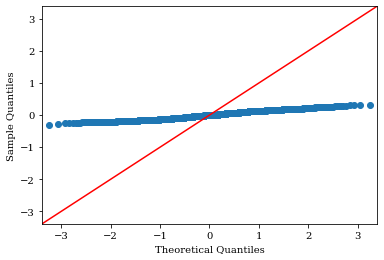


neutral score ~ neutral + final_LA
RONA-temp_opt


,sum_sq,df,F,PR(>F),perc_sum_sq
neutral,0.474117,1.0,46.410790,1.303718e-11,0.98
final_LA,29.792703,1.0,2916.372812,0.000000e+00,61.27
Residual,18.357559,1797.0,NaN,NaN,37.75


Model:              OLS              Adj. R-squared:     0.625     
Dependent Variable: score            AIC:                -3139.7222
Date:               2023-08-24 11:47 BIC:                -3123.2355
No. Observations:   1800             Log-Likelihood:     1572.9    
Df Model:           2                F-statistic:        1497.     
Df Residuals:       1797             Prob (F-statistic): 0.00      
R-squared:          0.625            Scale:              0.010216  


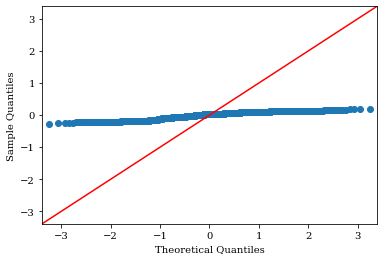


neutral score ~ neutral + final_LA
lfmm2


,sum_sq,df,F,PR(>F),perc_sum_sq
neutral,3.850970,1.0,904.991420,2.264913e-161,8.54
final_LA,33.621113,1.0,7901.079806,0.000000e+00,74.52
Residual,7.646694,1797.0,NaN,NaN,16.95


Model:              OLS              Adj. R-squared:     0.834     
Dependent Variable: score            AIC:                -4716.1047
Date:               2023-08-24 11:47 BIC:                -4699.6180
No. Observations:   1800             Log-Likelihood:     2361.1    
Df Model:           2                F-statistic:        4510.     
Df Residuals:       1797             Prob (F-statistic): 0.00      
R-squared:          0.834            Scale:              0.0042553 


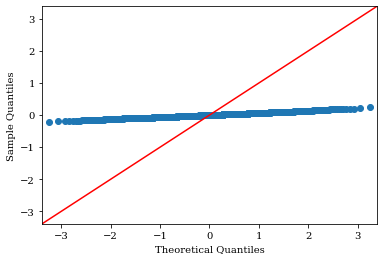


neutral score ~ neutral + final_LA
GF


,sum_sq,df,F,PR(>F),perc_sum_sq
neutral,9.307735,1.0,806.285674,7.828347e-147,10.99
final_LA,54.674860,1.0,4736.227912,0.000000e+00,64.53
Residual,20.744509,1797.0,NaN,NaN,24.48


Model:              OLS              Adj. R-squared:     0.760     
Dependent Variable: score            AIC:                -2919.6899
Date:               2023-08-24 11:47 BIC:                -2903.2033
No. Observations:   1800             Log-Likelihood:     1462.8    
Df Model:           2                F-statistic:        2849.     
Df Residuals:       1797             Prob (F-statistic): 0.00      
R-squared:          0.760            Scale:              0.011544  


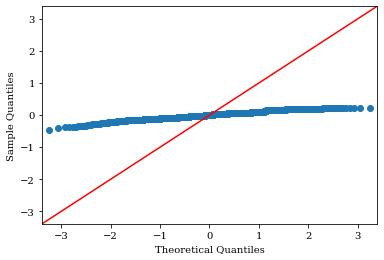


neutral score ~ neutral + final_LA
rda-nocorr


,sum_sq,df,F,PR(>F),perc_sum_sq
neutral,11.101811,1.0,881.053723,6.781767e-158,12.32
final_LA,56.367424,1.0,4473.389915,0.000000e+00,62.55
Residual,22.643289,1797.0,NaN,NaN,25.13


Model:              OLS              Adj. R-squared:     0.754     
Dependent Variable: score            AIC:                -2762.0425
Date:               2023-08-24 11:47 BIC:                -2745.5558
No. Observations:   1800             Log-Likelihood:     1384.0    
Df Model:           2                F-statistic:        2756.     
Df Residuals:       1797             Prob (F-statistic): 0.00      
R-squared:          0.754            Scale:              0.012601  


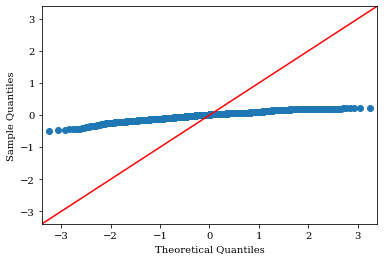


neutral score ~ neutral + final_LA
rda-structcorr


,sum_sq,df,F,PR(>F),perc_sum_sq
neutral,0.119567,1.0,6.613551,1.020031e-02,0.35
final_LA,1.952594,1.0,108.002905,1.315590e-24,5.65
Residual,32.488126,1797.0,NaN,NaN,94.00


Model:              OLS              Adj. R-squared:     0.058     
Dependent Variable: score            AIC:                -2112.2224
Date:               2023-08-24 11:47 BIC:                -2095.7358
No. Observations:   1800             Log-Likelihood:     1059.1    
Df Model:           2                F-statistic:        56.38     
Df Residuals:       1797             Prob (F-statistic): 1.79e-24  
R-squared:          0.059            Scale:              0.018079  


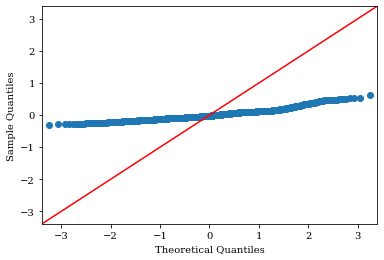

In [46]:
formula_key = 'neutral'
lms[formula_key], res[formula_key], sos[formula_key] = get_anova(formula_key, bcs_garden_data=neutral_data)


adaptive score ~ adaptive + final_LA
RONA-sal_opt


,sum_sq,df,F,PR(>F),perc_sum_sq
adaptive,12.545160,1.0,913.829757,1.200415e-162,30.70
final_LA,3.650704,1.0,265.928981,7.331165e-56,8.93
Residual,24.669423,1797.0,NaN,NaN,60.37


Model:              OLS              Adj. R-squared:     0.348     
Dependent Variable: score            AIC:                -2607.7806
Date:               2023-08-24 11:42 BIC:                -2591.2940
No. Observations:   1800             Log-Likelihood:     1306.9    
Df Model:           2                F-statistic:        482.0     
Df Residuals:       1797             Prob (F-statistic): 2.51e-168 
R-squared:          0.349            Scale:              0.013728  


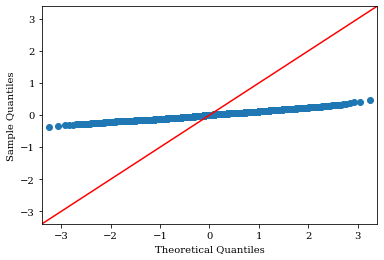


adaptive score ~ adaptive + final_LA
RONA-temp_opt


,sum_sq,df,F,PR(>F),perc_sum_sq
adaptive,1.653139,1.0,205.007930,4.090667e-44,3.25
final_LA,34.726740,1.0,4306.507288,0.000000e+00,68.26
Residual,14.490618,1797.0,NaN,NaN,28.49


Model:              OLS              Adj. R-squared:     0.707     
Dependent Variable: score            AIC:                -3565.4942
Date:               2023-08-24 11:42 BIC:                -3549.0076
No. Observations:   1800             Log-Likelihood:     1785.7    
Df Model:           2                F-statistic:        2177.     
Df Residuals:       1797             Prob (F-statistic): 0.00      
R-squared:          0.708            Scale:              0.0080638 


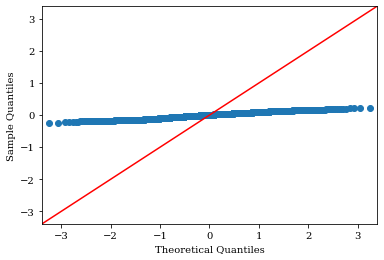


adaptive score ~ adaptive + final_LA
lfmm2


,sum_sq,df,F,PR(>F),perc_sum_sq
adaptive,0.189082,1.0,17.450809,3.089750e-05,0.63
final_LA,10.283206,1.0,949.058498,1.085336e-167,34.34
Residual,19.470792,1797.0,NaN,NaN,65.03


Model:              OLS              Adj. R-squared:     0.393     
Dependent Variable: score            AIC:                -3033.7488
Date:               2023-08-24 11:42 BIC:                -3017.2622
No. Observations:   1800             Log-Likelihood:     1519.9    
Df Model:           2                F-statistic:        582.6     
Df Residuals:       1797             Prob (F-statistic): 9.21e-196 
R-squared:          0.393            Scale:              0.010835  


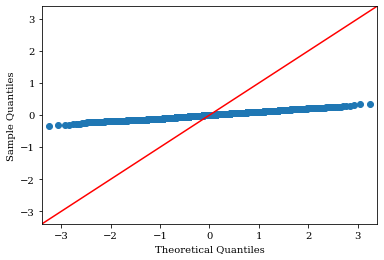


adaptive score ~ adaptive + final_LA
GF


,sum_sq,df,F,PR(>F),perc_sum_sq
adaptive,3.995182,1.0,293.170679,5.343339e-61,6.97
final_LA,28.850427,1.0,2117.074623,4.385782e-306,50.32
Residual,24.488611,1797.0,NaN,NaN,42.71


Model:              OLS              Adj. R-squared:     0.642     
Dependent Variable: score            AIC:                -2621.0221
Date:               2023-08-24 11:42 BIC:                -2604.5355
No. Observations:   1800             Log-Likelihood:     1313.5    
Df Model:           2                F-statistic:        1617.     
Df Residuals:       1797             Prob (F-statistic): 0.00      
R-squared:          0.643            Scale:              0.013627  


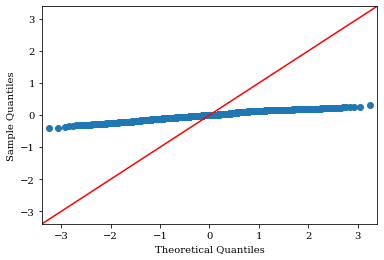


adaptive score ~ adaptive + final_LA
rda-nocorr


,sum_sq,df,F,PR(>F),perc_sum_sq
adaptive,8.972001,1.0,435.183054,1.014750e-86,14.66
final_LA,15.186588,1.0,736.618920,3.105725e-136,24.81
Residual,37.048055,1797.0,NaN,NaN,60.53


Model:              OLS              Adj. R-squared:     0.486     
Dependent Variable: score            AIC:                -1875.8082
Date:               2023-08-24 11:42 BIC:                -1859.3216
No. Observations:   1800             Log-Likelihood:     940.90    
Df Model:           2                F-statistic:        850.9     
Df Residuals:       1797             Prob (F-statistic): 9.95e-261 
R-squared:          0.486            Scale:              0.020617  


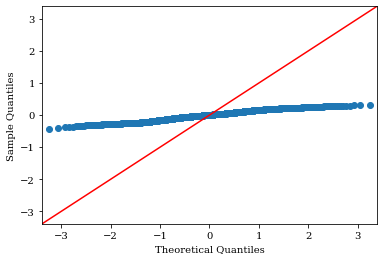


adaptive score ~ adaptive + final_LA
rda-structcorr


,sum_sq,df,F,PR(>F),perc_sum_sq
adaptive,0.532928,1.0,27.134073,2.116398e-07,1.17
final_LA,9.774854,1.0,497.687680,1.610381e-97,21.44
Residual,35.294047,1797.0,NaN,NaN,77.40


Model:              OLS              Adj. R-squared:     0.217     
Dependent Variable: score            AIC:                -1963.1110
Date:               2023-08-24 11:42 BIC:                -1946.6244
No. Observations:   1800             Log-Likelihood:     984.56    
Df Model:           2                F-statistic:        250.8     
Df Residuals:       1797             Prob (F-statistic): 8.82e-97  
R-squared:          0.218            Scale:              0.019641  


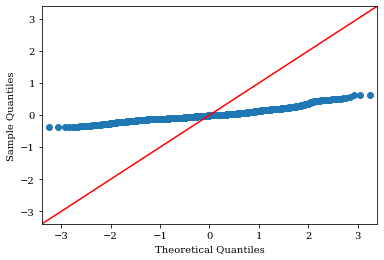

In [40]:
formula_key = 'adaptive'
lms[formula_key], res[formula_key], sos[formula_key] = get_anova(formula_key, bcs_garden_data=adaptive_data)


super_simple score ~ all + final_LA
RONA-sal_opt


,sum_sq,df,F,PR(>F),perc_sum_sq
all,13.066056,1.0,939.445081,2.543708e-166,34.04
final_LA,0.321152,1.0,23.090730,1.673759e-06,0.84
Residual,24.993162,1797.0,NaN,NaN,65.12


Model:              OLS              Adj. R-squared:     0.356     
Dependent Variable: score            AIC:                -2584.3127
Date:               2023-08-24 11:43 BIC:                -2567.8261
No. Observations:   1800             Log-Likelihood:     1295.2    
Df Model:           2                F-statistic:        497.7     
Df Residuals:       1797             Prob (F-statistic): 1.02e-172 
R-squared:          0.356            Scale:              0.013908  


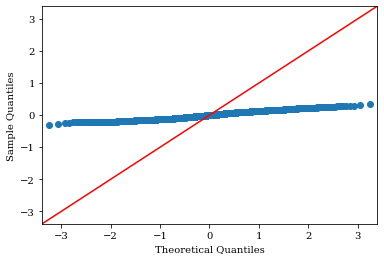


super_simple score ~ all + final_LA
RONA-temp_opt


,sum_sq,df,F,PR(>F),perc_sum_sq
all,0.086501,1.0,8.324025,0.003959,0.18
final_LA,30.251825,1.0,2911.137332,0.000000,61.72
Residual,18.673983,1797.0,NaN,NaN,38.10


Model:              OLS              Adj. R-squared:     0.622     
Dependent Variable: score            AIC:                -3108.9605
Date:               2023-08-24 11:43 BIC:                -3092.4739
No. Observations:   1800             Log-Likelihood:     1557.5    
Df Model:           2                F-statistic:        1484.     
Df Residuals:       1797             Prob (F-statistic): 0.00      
R-squared:          0.623            Scale:              0.010392  


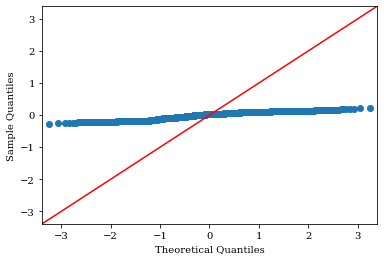


super_simple score ~ all + final_LA
lfmm2


,sum_sq,df,F,PR(>F),perc_sum_sq
all,3.673454,1.0,873.091702,9.874623e-157,8.64
final_LA,31.290136,1.0,7436.913517,0.000000e+00,73.58
Residual,7.560714,1797.0,NaN,NaN,17.78


Model:              OLS              Adj. R-squared:     0.830     
Dependent Variable: score            AIC:                -4736.4587
Date:               2023-08-24 11:43 BIC:                -4719.9721
No. Observations:   1800             Log-Likelihood:     2371.2    
Df Model:           2                F-statistic:        4408.     
Df Residuals:       1797             Prob (F-statistic): 0.00      
R-squared:          0.831            Scale:              0.0042074 


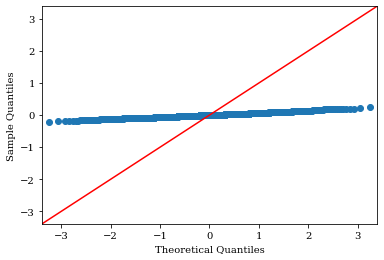


super_simple score ~ all + final_LA
GF


,sum_sq,df,F,PR(>F),perc_sum_sq
all,8.505224,1.0,749.172746,3.638160e-138,10.54
final_LA,51.787680,1.0,4561.657568,0.000000e+00,64.18
Residual,20.401019,1797.0,NaN,NaN,25.28


Model:              OLS              Adj. R-squared:     0.759     
Dependent Variable: score            AIC:                -2949.7441
Date:               2023-08-24 11:43 BIC:                -2933.2575
No. Observations:   1800             Log-Likelihood:     1477.9    
Df Model:           2                F-statistic:        2836.     
Df Residuals:       1797             Prob (F-statistic): 0.00      
R-squared:          0.759            Scale:              0.011353  


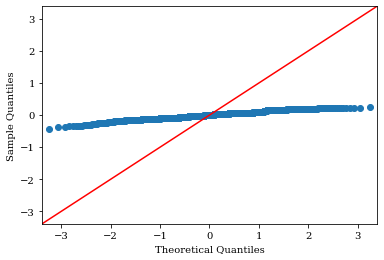


super_simple score ~ all + final_LA
rda-nocorr


,sum_sq,df,F,PR(>F),perc_sum_sq
all,10.763364,1.0,827.118396,6.020460e-150,12.54
final_LA,51.668736,1.0,3970.521018,0.000000e+00,60.21
Residual,23.384518,1797.0,NaN,NaN,27.25


Model:              OLS              Adj. R-squared:     0.741     
Dependent Variable: score            AIC:                -2704.0633
Date:               2023-08-24 11:43 BIC:                -2687.5767
No. Observations:   1800             Log-Likelihood:     1355.0    
Df Model:           2                F-statistic:        2574.     
Df Residuals:       1797             Prob (F-statistic): 0.00      
R-squared:          0.741            Scale:              0.013013  


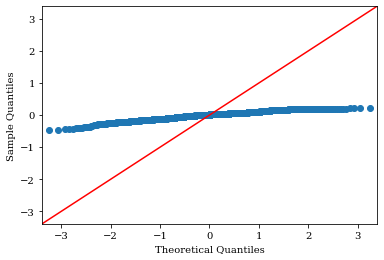


super_simple score ~ all + final_LA
rda-structcorr


,sum_sq,df,F,PR(>F),perc_sum_sq
all,3.192007,1.0,78.914320,1.537690e-18,4.20
final_LA,0.062105,1.0,1.535395,2.154664e-01,0.08
Residual,72.686890,1797.0,NaN,NaN,95.71


Model:              OLS              Adj. R-squared:     0.043    
Dependent Variable: score            AIC:                -662.7069
Date:               2023-08-24 11:43 BIC:                -646.2203
No. Observations:   1800             Log-Likelihood:     334.35   
Df Model:           2                F-statistic:        41.48    
Df Residuals:       1797             Prob (F-statistic): 2.44e-18 
R-squared:          0.044            Scale:              0.040449 


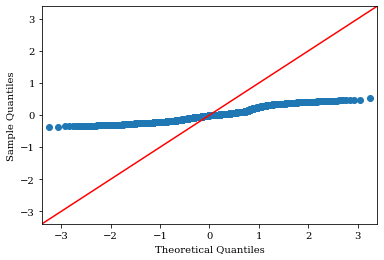

In [41]:
formula_key = 'all'
lms[formula_key], res[formula_key], sos[formula_key] = get_anova(formula_key, bcs_garden_data=all_data)


only adaptive score ~ adaptive
RONA-sal_opt


,sum_sq,df,F,PR(>F),perc_sum_sq
adaptive,9.584468,1.0,608.5027,5.780083e-116,25.29
Residual,28.320127,1798.0,NaN,NaN,74.71


Model:              OLS              Adj. R-squared:     0.252     
Dependent Variable: score            AIC:                -2361.3659
Date:               2023-08-24 11:56 BIC:                -2350.3748
No. Observations:   1800             Log-Likelihood:     1182.7    
Df Model:           1                F-statistic:        608.5     
Df Residuals:       1798             Prob (F-statistic): 5.78e-116 
R-squared:          0.253            Scale:              0.015751  


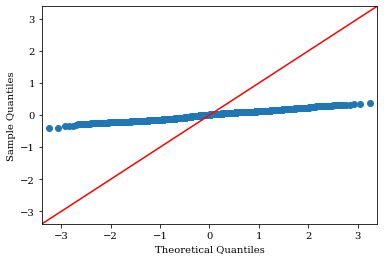


only adaptive score ~ adaptive
RONA-temp_opt


,sum_sq,df,F,PR(>F),perc_sum_sq
adaptive,0.377136,1.0,13.777467,0.000212,0.76
Residual,49.217358,1798.0,NaN,NaN,99.24


Model:              OLS              Adj. R-squared:     0.007     
Dependent Variable: score            AIC:                -1366.5533
Date:               2023-08-24 11:56 BIC:                -1355.5622
No. Observations:   1800             Log-Likelihood:     685.28    
Df Model:           1                F-statistic:        13.78     
Df Residuals:       1798             Prob (F-statistic): 0.000212  
R-squared:          0.008            Scale:              0.027373  


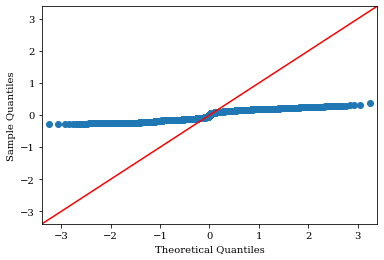


only adaptive score ~ adaptive
lfmm2


,sum_sq,df,F,PR(>F),perc_sum_sq
adaptive,2.342057,1.0,141.527807,1.807651e-31,7.3
Residual,29.753998,1798.0,NaN,NaN,92.7


Model:              OLS              Adj. R-squared:     0.072     
Dependent Variable: score            AIC:                -2272.4624
Date:               2023-08-24 11:56 BIC:                -2261.4714
No. Observations:   1800             Log-Likelihood:     1138.2    
Df Model:           1                F-statistic:        141.5     
Df Residuals:       1798             Prob (F-statistic): 1.81e-31  
R-squared:          0.073            Scale:              0.016548  


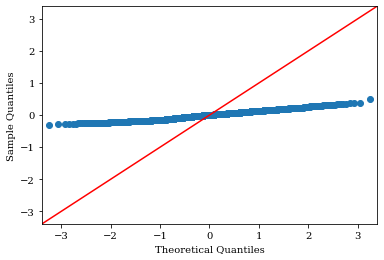


only adaptive score ~ adaptive
GF


,sum_sq,df,F,PR(>F),perc_sum_sq
adaptive,15.232714,1.0,513.477935,3.306510e-100,22.21
Residual,53.339038,1798.0,NaN,NaN,77.79


Model:              OLS              Adj. R-squared:     0.222     
Dependent Variable: score            AIC:                -1221.7935
Date:               2023-08-24 11:56 BIC:                -1210.8024
No. Observations:   1800             Log-Likelihood:     612.90    
Df Model:           1                F-statistic:        513.5     
Df Residuals:       1798             Prob (F-statistic): 3.31e-100 
R-squared:          0.222            Scale:              0.029666  


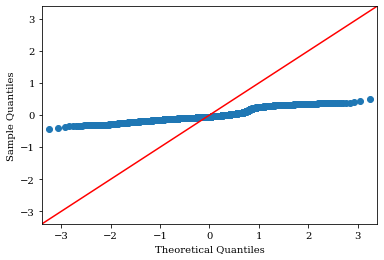


only adaptive score ~ adaptive
rda-nocorr


,sum_sq,df,F,PR(>F),perc_sum_sq
adaptive,19.899217,1.0,684.962898,3.397797e-128,27.59
Residual,52.234643,1798.0,NaN,NaN,72.41


Model:              OLS              Adj. R-squared:     0.275     
Dependent Variable: score            AIC:                -1259.4541
Date:               2023-08-24 11:56 BIC:                -1248.4630
No. Observations:   1800             Log-Likelihood:     631.73    
Df Model:           1                F-statistic:        685.0     
Df Residuals:       1798             Prob (F-statistic): 3.40e-128 
R-squared:          0.276            Scale:              0.029052  


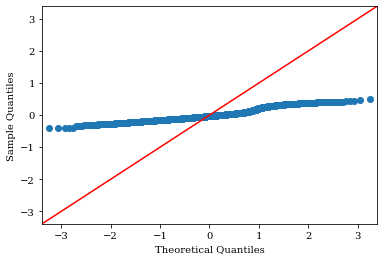


only adaptive score ~ adaptive
rda-structcorr


,sum_sq,df,F,PR(>F),perc_sum_sq
adaptive,0.075812,1.0,3.024484,0.082188,0.17
Residual,45.068901,1798.0,NaN,NaN,99.83


Model:              OLS              Adj. R-squared:     0.001     
Dependent Variable: score            AIC:                -1525.0504
Date:               2023-08-24 11:56 BIC:                -1514.0593
No. Observations:   1800             Log-Likelihood:     764.53    
Df Model:           1                F-statistic:        3.024     
Df Residuals:       1798             Prob (F-statistic): 0.0822    
R-squared:          0.002            Scale:              0.025066  


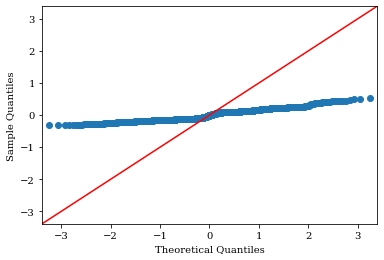

In [51]:
formula_key = 'only adaptive'
lms[formula_key], res[formula_key], sos[formula_key] = get_anova(formula_key, bcs_garden_data=adaptive_data)

In [61]:
for df in [all_data, adaptive_data, neutral_data]:
    df.pop('meanFST')
    df['meanFst'] = df.index.map(summary.meanFst)

In [63]:
?plt.subplots

In [74]:
?ax.scatter

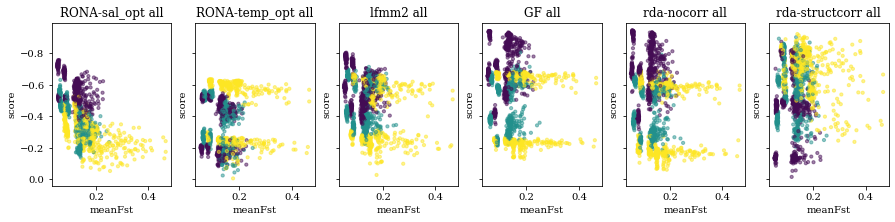

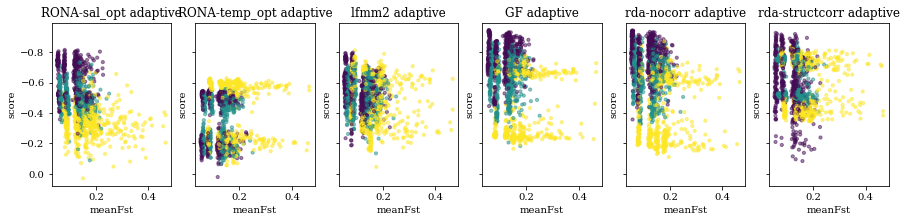

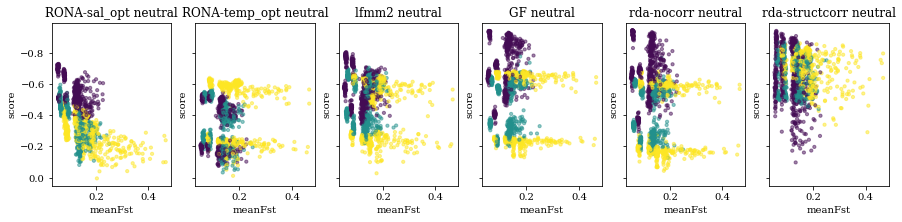

In [92]:
for df, mset in zip([all_data, adaptive_data, neutral_data], ['all', 'adaptive', 'neutral']):
    fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15, 3), sharex=True, sharey=True)
    
    for i, program in enumerate(df.program.unique()):
        ax = axes[i]
        pdf = df[df.program == program].copy()
        
        pdf['landscape'] = pdf.index.map(params.landscape)
        
        ax.scatter(pdf['meanFst'],
                   pdf.score,
                   s=10,
                   c=pdf.landscape.map(mvp.boxplot_kwargs['palette']),
                   alpha=0.5).axes.set_title(f'{program} {mset}')
        ax.set_xlabel('meanFst')
        ax.set_ylabel('score')
        if i ==0:
            ax.axes.invert_yaxis()
        
    plt.show()

In [83]:
params = mvp.read_params_file()
params.head()

100%|███████████████| 2250/2250 [00:02<00:00, 822.40it/s]


,level,reps,arch,demog_name,demog_level_sub,demog_level,MIG_x,MIG_y,xcline,ycline,demog,METAPOP_SIDE_x,METAPOP_SIDE_y,Nequal,isVariableM,MIG_breaks,arch_level_sub,arch_level,MU_base,MU_QTL_proportion,SIGMA_QTN_1,SIGMA_QTN_2,SIGMA_K_1,SIGMA_K_2,N_traits,ispleiotropy,seed,glevel,plevel,pleio,slevel,landscape,popsize,migration
1231094,highly-polygenic_1-trait__Est-Clines_N-cline-c...,1,highly-polygenic_1-trait,Est-Clines_N-cline-center-to-edge_m-constant,N-cline-center-to-edge_m-constant,Est-Clines,0.49,0.07,linear,linear,Estuary,10,10,4,0,0,1-trait,highly-polygenic,1.000000e-07,0.25,0.002,0.002,0.5,0.5,1,0,1231094,highly-polygenic,1-trait,no pleiotropy,NaN,Est-Clines,N-cline-center-to-edge,m-constant
1231095,highly-polygenic_1-trait__Est-Clines_N-cline-N...,1,highly-polygenic_1-trait,Est-Clines_N-cline-N-to-S_m-constant,N-cline-N-to-S_m-constant,Est-Clines,0.49,0.07,linear,linear,Estuary,10,10,2,0,0,1-trait,highly-polygenic,1.000000e-07,0.25,0.002,0.002,0.5,0.5,1,0,1231095,highly-polygenic,1-trait,no pleiotropy,NaN,Est-Clines,N-cline-N-to-S,m-constant
1231096,highly-polygenic_1-trait__Est-Clines_N-equal_m...,1,highly-polygenic_1-trait,Est-Clines_N-equal_m_breaks,N-equal_m_breaks,Est-Clines,0.49,0.07,linear,linear,Estuary,10,10,0,0,1,1-trait,highly-polygenic,1.000000e-07,0.25,0.002,0.002,0.5,0.5,1,0,1231096,highly-polygenic,1-trait,no pleiotropy,NaN,Est-Clines,N-equal,m-breaks
1231097,highly-polygenic_1-trait__Est-Clines_N-equal_m...,1,highly-polygenic_1-trait,Est-Clines_N-equal_m-constant,N-equal_m-constant,Est-Clines,0.49,0.07,linear,linear,Estuary,10,10,0,0,0,1-trait,highly-polygenic,1.000000e-07,0.25,0.002,0.002,0.5,0.5,1,0,1231097,highly-polygenic,1-trait,no pleiotropy,NaN,Est-Clines,N-equal,m-constant
1231098,highly-polygenic_1-trait__Est-Clines_N-variabl...,1,highly-polygenic_1-trait,Est-Clines_N-variable_m-variable,N-variable_m-variable,Est-Clines,0.49,0.07,linear,linear,Estuary,10,10,3,1,0,1-trait,highly-polygenic,1.000000e-07,0.25,0.002,0.002,0.5,0.5,1,0,1231098,highly-polygenic,1-trait,no pleiotropy,NaN,Est-Clines,N-variable,m-variable


In [84]:
pdf.index.map(params.landscape)

Index(['Est-Clines', 'Est-Clines', 'Est-Clines', 'Est-Clines', 'Est-Clines',
       'SS-Clines', 'SS-Clines', 'SS-Clines', 'SS-Clines', 'SS-Clines',
       ...
       'SS-Clines', 'SS-Clines', 'SS-Clines', 'SS-Clines', 'SS-Clines',
       'SS-Mtn', 'SS-Mtn', 'SS-Mtn', 'SS-Mtn', 'SS-Mtn'],
      dtype='object', length=1800)

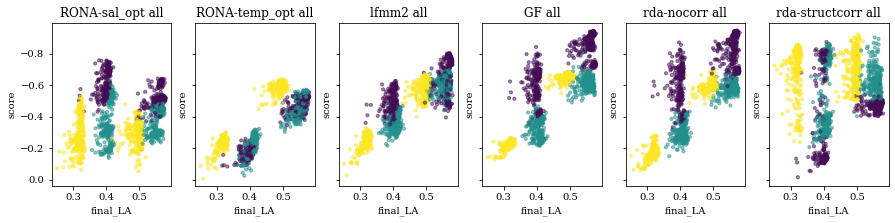

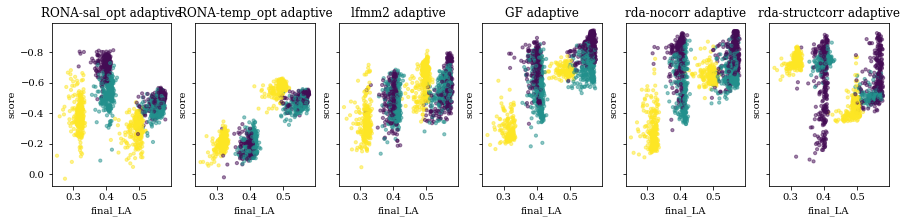

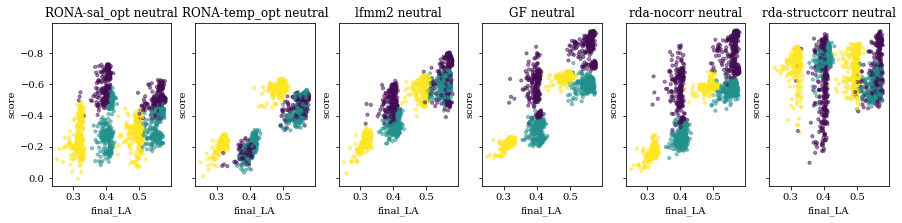

In [90]:
for df, mset in zip([all_data, adaptive_data, neutral_data], ['all', 'adaptive', 'neutral']):
    fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15, 3), sharex=True, sharey=True)
    
    for i, program in enumerate(df.program.unique()):
        ax = axes[i]
        pdf = df[df.program == program].copy()
        
        pdf['landscape'] = pdf.index.map(params.landscape)
        
        ax.scatter(pdf['final_LA'],
                   pdf.score,
                   s=10,
                   c=pdf.landscape.map(mvp.boxplot_kwargs['palette']),
                   alpha=0.5).axes.set_title(f'{program} {mset}')
        ax.set_xlabel('final_LA')
        ax.set_ylabel('score')
        if i == 0:
            ax.axes.invert_yaxis()
        
    plt.show() 

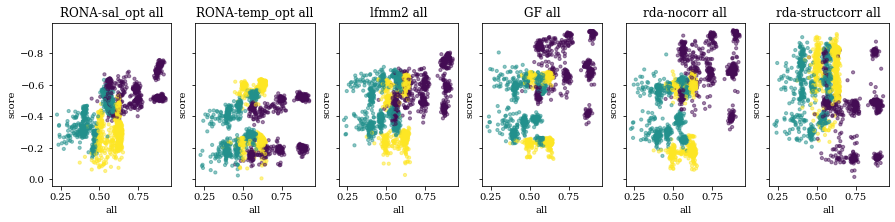

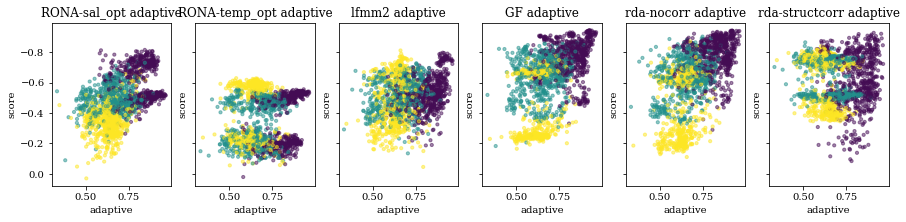

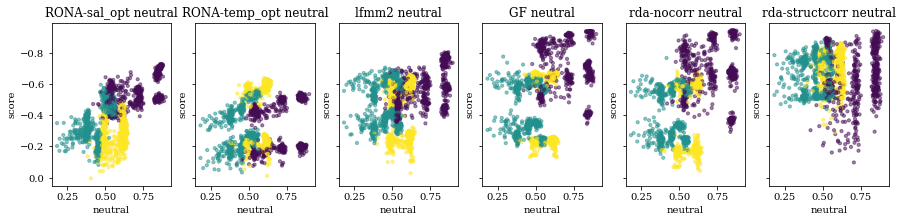

In [89]:
for df, mset in zip([all_data, adaptive_data, neutral_data], ['all', 'adaptive', 'neutral']):
    fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15, 3), sharex=True, sharey=True)
    
    for i, program in enumerate(df.program.unique()):
        ax = axes[i]
        pdf = df[df.program == program].copy()
        
        pdf['landscape'] = pdf.index.map(params.landscape)
        
        ax.scatter(pdf[mset],
                   pdf.score,
                   s=10,
                   c=pdf.landscape.map(mvp.boxplot_kwargs['palette']),
                   alpha=0.5).axes.set_title(f'{program} {mset}')
        ax.set_xlabel(mset)
        ax.set_ylabel('score')
        if i == 0:
            ax.axes.invert_yaxis()
        
    plt.show()